<a href="https://colab.research.google.com/github/naveenkvarma/ML/blob/main/Naveen_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### - **Project Scenario:**
You are a Data Scientist with a housing agency in Boston MA, you have been given access to a previous dataset on housing prices derived from the U.S. Census Service to present insights to higher management. Based on your experience in Statistics, what information can you provide them to help with making an informed decision? Upper management will like to get some insight into the following.

    - Is there a significant difference in the median value of houses bounded by the Charles river or not?

    - Is there a difference in median values of houses of each proportion of owner-occupied units built before 1940?

    - Can we conclude that there is no relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town?

    - What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes?

Using the appropriate graphs and charts, generate basic statistics and visualizations that you think will be useful for the upper management to give them important insight given the question they are asking, in your graphs, include an explanation of each statistic.

# **Task-1:** Become familiar with the dataset

In [ ]:
#importing and reading the dataset
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv(r"Housing_Dataset.csv", encoding='windows-1252')
df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,6.973713,25,19.779447,0,0.436535,6.177618,91.454866,3.037974,4,448,17.205438,34.529122,9.933837
1,1.893886,63,5.803390,0,0.559039,6.327385,43.402097,4.065074,24,638,16.406649,9.168084,20.810691
2,8.181508,97,0.841945,0,0.449363,6.760050,25.871164,3.405808,22,402,20.799146,29.929931,7.680634
3,15.184239,58,7.081129,0,0.770340,6.068588,43.440332,3.011216,2,346,17.055208,27.849112,4.244290
4,1.126773,55,16.067104,0,0.429648,6.215635,72.344782,10.082820,14,234,17.077578,4.232809,21.775952


# **Task 2:** Generate Descriptive Statistics and Visualizations

In [ ]:
# Displaying the shape of the dataset and checking for null values and data types
data_info = {
    "Shape": df.shape,
    "Data Types": df.dtypes,
    "Null Values": df.isnull().sum()
}

# 2. Summary Statistics
summary_stats = df.describe()
summary_stats

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,6.708281,47.886000,13.933101,0.054000,0.546986,5.999432,49.803636,6.355506,12.846000,440.006000,16.889013,19.340881,13.975185
std,5.087396,28.951639,8.080701,0.226244,0.142828,0.671200,28.288707,3.198184,6.709121,144.465451,2.902830,10.073164,5.869450
min,0.080658,0.000000,0.133379,0.000000,0.300783,3.886341,0.199214,1.007187,1.000000,200.000000,12.002270,2.216434,-2.129478
25%,2.881990,24.000000,6.403593,0.000000,0.429663,5.550962,24.486341,3.576996,7.000000,314.000000,14.372649,11.015783,9.630526
50%,5.574444,48.000000,14.572935,0.000000,0.544141,6.007468,50.634690,6.111252,13.000000,431.500000,16.744635,18.882827,14.347390
75%,9.304572,72.000000,20.904860,0.000000,0.664918,6.459716,73.945273,9.254309,19.000000,566.250000,19.490647,27.739052,18.409404
max,33.821852,99.000000,26.984171,1.000000,0.797719,8.196424,99.889261,11.995135,24.000000,699.000000,21.957345,36.957753,28.448381


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


[<Figure size 800x600 with 1 Axes>,
 <Figure size 800x600 with 1 Axes>,
 <Figure size 1000x600 with 1 Axes>,
 <Figure size 1000x600 with 1 Axes>,
 <Figure size 800x600 with 1 Axes>]

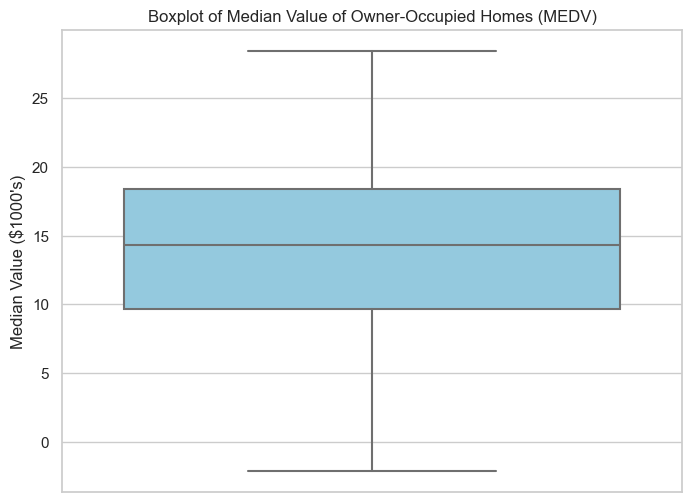

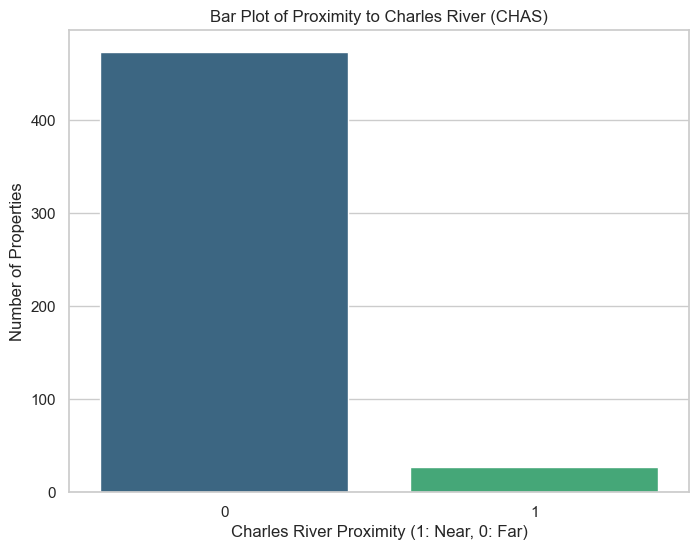

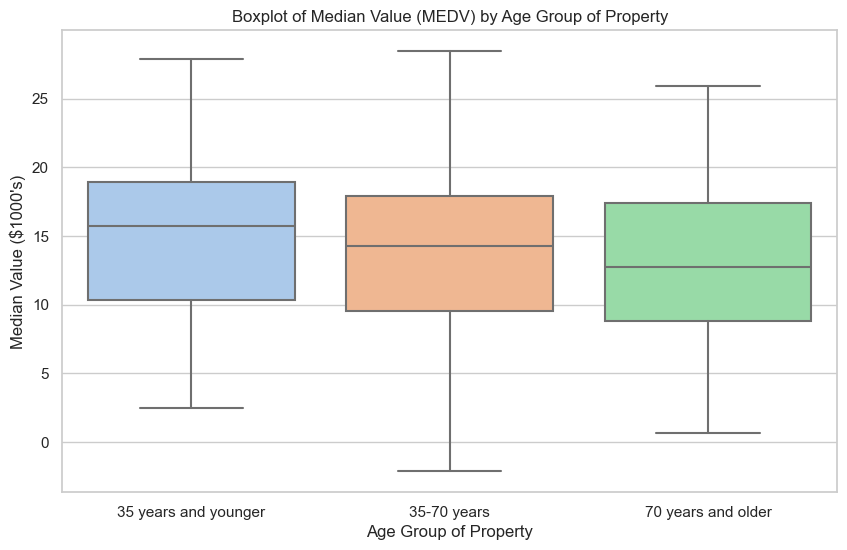

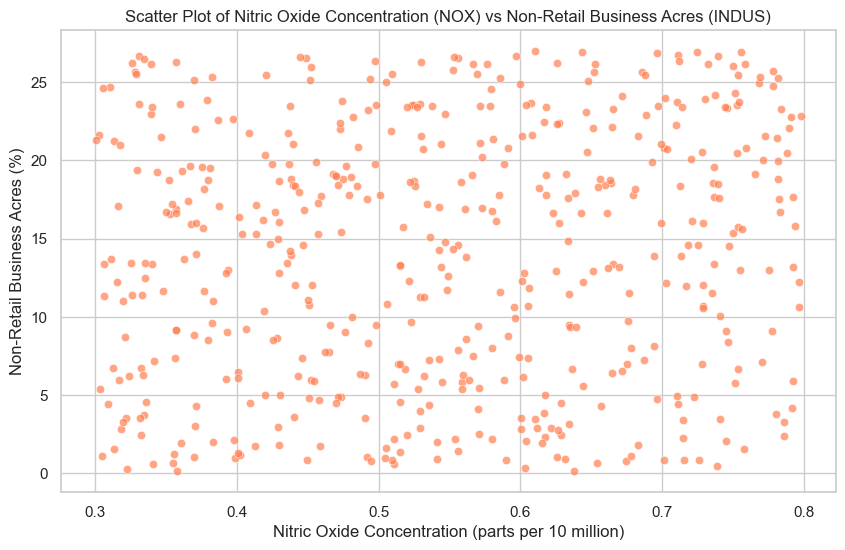

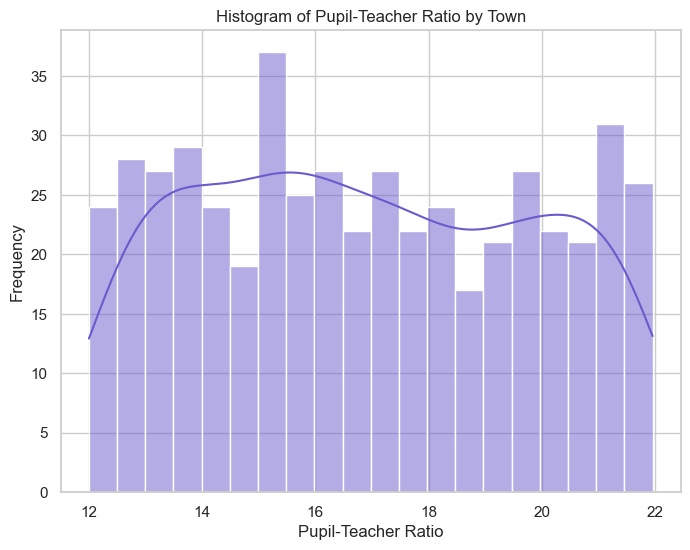

In [ ]:
# Set general style for plots
sns.set(style="whitegrid")

# Create figures for each requested visualization
figures = []

# 1. Boxplot for "Median value of owner-occupied homes" (MEDV)
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, y="MEDV", color="skyblue")
plt.title("Boxplot of Median Value of Owner-Occupied Homes (MEDV)")
plt.ylabel("Median Value ($1000's)")
figures.append(plt.gcf())

# 2. Bar plot for the Charles River variable (CHAS)
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x="CHAS", palette="viridis")
plt.title("Bar Plot of Proximity to Charles River (CHAS)")
plt.xlabel("Charles River Proximity (1: Near, 0: Far)")
plt.ylabel("Number of Properties")
figures.append(plt.gcf())

# 3. Boxplot for MEDV variable vs AGE groups
# Discretize AGE variable into three groups
df["AGE_group"] = pd.cut(df["AGE"], bins=[0, 35, 70, 100], labels=["35 years and younger", "35-70 years", "70 years and older"])

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="AGE_group", y="MEDV", palette="pastel")
plt.title("Boxplot of Median Value (MEDV) by Age Group of Property")
plt.xlabel("Age Group of Property")
plt.ylabel("Median Value ($1000's)")
figures.append(plt.gcf())

# 4. Scatter plot to show the relationship between NOX and INDUS
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="NOX", y="INDUS", color="coral", alpha=0.7)
plt.title("Scatter Plot of Nitric Oxide Concentration (NOX) vs Non-Retail Business Acres (INDUS)")
plt.xlabel("Nitric Oxide Concentration (parts per 10 million)")
plt.ylabel("Non-Retail Business Acres (%)")
figures.append(plt.gcf())

# 5. Histogram for the pupil-to-teacher ratio (PTRATIO)
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x="PTRATIO", bins=20, kde=True, color="slateblue")
plt.title("Histogram of Pupil-Teacher Ratio by Town")
plt.xlabel("Pupil-Teacher Ratio")
plt.ylabel("Frequency")
figures.append(plt.gcf())

# Display all figures
figures


### **Observations for each plot**
- **Boxplot of Median Home Values (MEDV):**  
Shows the distribution of home values, with some high-value outliers likely due to features like river proximity or low crime.

- **Bar Plot of Charles River Proximity (CHAS):**  
Most properties are not near the river (CHAS=0), but those near it (CHAS=1) may hold higher value due to location.

- **Boxplot of Home Values by Property Age:**  
Newer properties (≤35 years) generally have higher median values. Older homes, especially over 70 years, show more value variability, possibly due to condition or historical factors.

- **Scatter Plot of NOX vs. Industrial Land (INDUS):**  
A positive trend between NOX and INDUS suggests higher pollution in more industrialized areas, potentially reducing area desirability.

- **Histogram of Pupil-Teacher Ratio (PTRATIO):**  
Most values cluster within a specific range, hinting at regional education standards that could influence family appeal.

# **Task 3:** Use the appropriate tests to answer the questions provided.

In [ ]:
from scipy.stats import ttest_ind, f_oneway, pearsonr
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# 1. T-Test for independent samples (MEDV based on CHAS)
# Separate MEDV values based on CHAS (1: bounded by river, 0: not bounded)
medv_river = df[df["CHAS"] == 1]["MEDV"]
medv_no_river = df[df["CHAS"] == 0]["MEDV"]
t_stat, p_value_ttest = ttest_ind(medv_river, medv_no_river)

# 2. ANOVA test (MEDV across AGE groups)
age_groups = df.groupby("AGE_group")["MEDV"].apply(list)
f_stat, p_value_anova = f_oneway(*age_groups)

# 3. Pearson Correlation (NOX and INDUS)
pearson_corr, p_value_pearson = pearsonr(df["NOX"], df["INDUS"])

# 4. Regression Analysis (DIS impact on MEDV)
X = df["DIS"].values.reshape(-1, 1)  # Independent variable
y = df["MEDV"].values  # Dependent variable

# Fit the linear regression model
reg_model = LinearRegression().fit(X, y)
slope = reg_model.coef_[0]
intercept = reg_model.intercept_
r_squared = reg_model.score(X, y)

# Regression summary with statsmodels for more details
X_with_constant = sm.add_constant(X)  # Add constant for statsmodels
regression_results = sm.OLS(y, X_with_constant).fit()
regression_summary = regression_results.summary()

# Compile results for interpretation
{
    "T-Test": {"t-statistic": t_stat, "p-value": p_value_ttest},
    "ANOVA": {"f-statistic": f_stat, "p-value": p_value_anova},
    "Pearson Correlation": {"correlation_coefficient": pearson_corr, "p-value": p_value_pearson},
    "Regression": {
        "slope": slope,
        "intercept": intercept,
        "r_squared": r_squared,
        "regression_summary": regression_summary
    }
}


C:\Users\nvarm\AppData\Local\Temp\ipykernel_18212\642600708.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_groups = df.groupby("AGE_group")["MEDV"].apply(list)


{'T-Test': {'t-statistic': 1.6298164872552714, 'p-value': 0.1037725956271632},
 'ANOVA': {'f-statistic': 5.476138060811374, 'p-value': 0.004441905189068621},
 'Pearson Correlation': {'correlation_coefficient': 0.10869662804234487,
  'p-value': 0.01502998452793554},
 'Regression': {'slope': -0.004477931459629379,
  'intercept': 14.003644990334118,
  'r_squared': 5.953427262617161e-06,
  'regression_summary': <class 'statsmodels.iolib.summary.Summary'>
  """
                              OLS Regression Results                            
  Dep. Variable:                      y   R-squared:                       0.000
  Model:                            OLS   Adj. R-squared:                 -0.002
  Method:                 Least Squares   F-statistic:                  0.002965
  Date:                Sat, 02 Nov 2024   Prob (F-statistic):              0.957
  Time:                        16:52:30   Log-Likelihood:                -1593.8
  No. Observations:                 500   AIC:       

### **Observations for each question:**

1. **T-Test for River Proximity (CHAS):**  
   The p-value (0.104) indicates no statistically significant difference in median home values based on proximity to the Charles River.

2. **ANOVA on Age Groups (AGE):**  
   The p-value (0.0044) suggests significant differences in median home values among age groups, with younger, middle-aged, and older properties showing varying values.

3. **Pearson Correlation (NOX and INDUS):**  
   A weak but significant positive correlation (p-value = 0.015) exists between nitric oxide concentration and industrial land proportion, implying higher pollution in more industrialized areas.

4. **Regression Analysis (DIS and MEDV):**  
   The p-value (0.957) and very low R-squared indicate that distance to employment centers does not significantly impact median home values, explaining almost none of the variability in home values.